In [1]:
#内嵌画图，省略掉plt.show()这一步，直接显示图像。
%matplotlib inline   

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.express as px
# import plotly.figure_factory as ff 
# import plotly.graph_objs as go

plt.rcParams['font.sans-serif'] = ['SimHei']  #防止中文乱码，还可以有Microsoft YaHei
plt.rcParams["axes.unicode_minus"] = False   #字符显示，防止负号乱码

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

d:\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
l1 = pd.read_csv("data//MAE (L1) Loss.csv")
l2 = pd.read_csv("data//CE (Cross-Entropy) Loss.csv")
l3 = pd.read_csv("data//Focal Loss (gamma=0.5).csv")
l4 = pd.read_csv("data//Focal Loss (gamma=2).csv")

In [3]:
l1.head().T


,0,1,2,3,4
training_loss_SGD,0.000860,0.000858,0.000857,0.000852,0.000858
training_acc_SGD,0.096900,0.100560,0.100940,0.098640,0.100920
testing_loss_SGD,0.000874,0.000860,0.000894,0.000909,0.000872
testing_acc_SGD,0.100000,0.100000,0.100000,0.100000,0.100100
testing_loss_SGD_S,0.000875,0.000860,0.000894,0.000907,0.000870
testing_acc_SGD_S,0.100000,0.099700,0.100000,0.099900,0.099900
training_loss_Adam,0.000783,0.000783,0.000783,0.000783,0.000783
training_acc_Adam,0.100460,0.098620,0.100260,0.102340,0.101260
testing_loss_Adam,0.000791,0.000791,0.000791,0.000791,0.000791
testing_acc_Adam,0.100000,0.100000,0.100000,0.100000,0.100000


# Accuracy

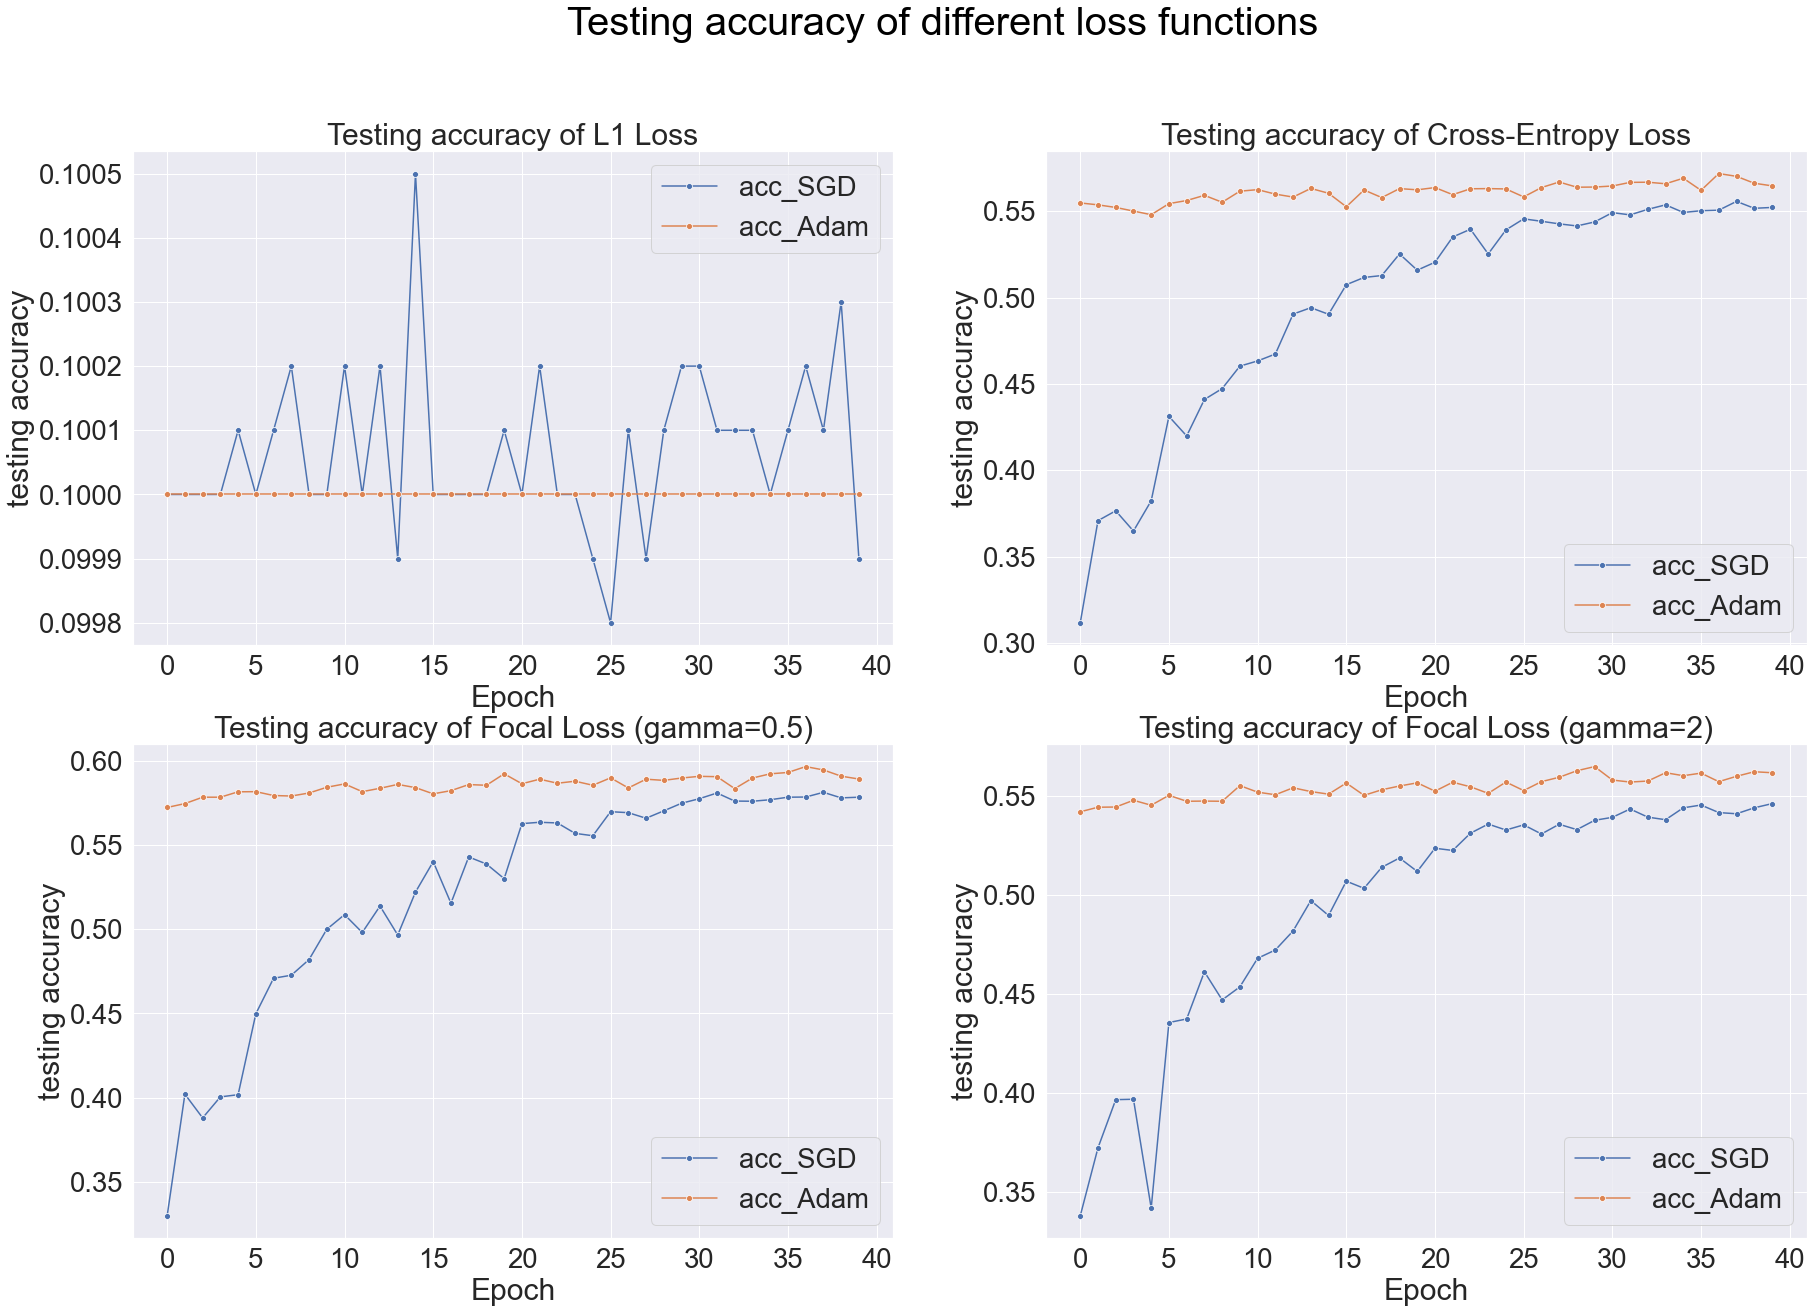

In [4]:
plt.figure(figsize=(30, 20))  #创建画布，用于放置子图
plt.suptitle('Testing accuracy of different loss functions', fontsize=40)  #给总画布取名字
sns.set(font_scale=2.5)

plt.subplot(221) #构建两行两列，并在第一个子图绘图
sns.lineplot(data=l1['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o')
sns.lineplot(data=l1['testing_acc_Adam'], label='acc_Adam', markers=True, marker='o')
plt.xlabel('Epoch')
plt.ylabel('testing accuracy')
plt.title('Testing accuracy of L1 Loss')

plt.subplot(222) 
sns.lineplot(data=l2['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o')
sns.lineplot(data=l2['testing_acc_Adam'], label='acc_Adam', markers=True, marker='o',)
plt.xlabel('Epoch')
plt.ylabel('testing accuracy')
plt.title('Testing accuracy of Cross-Entropy Loss')

plt.subplot(223) 
sns.lineplot(data=l3['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o')
sns.lineplot(data=l3['testing_acc_Adam'], label='acc_Adam', markers=True, marker='o',)
plt.xlabel('Epoch')
plt.ylabel('testing accuracy')
plt.title('Testing accuracy of Focal Loss (gamma=0.5)')

plt.subplot(224) 
sns.lineplot(data=l4['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o')
sns.lineplot(data=l4['testing_acc_Adam'], label='acc_Adam', markers=True, marker='o',)
plt.xlabel('Epoch')
plt.ylabel('testing accuracy')
plt.title('Testing accuracy of Focal Loss (gamma=2)')

plt.savefig("fig//Acc1.svg")

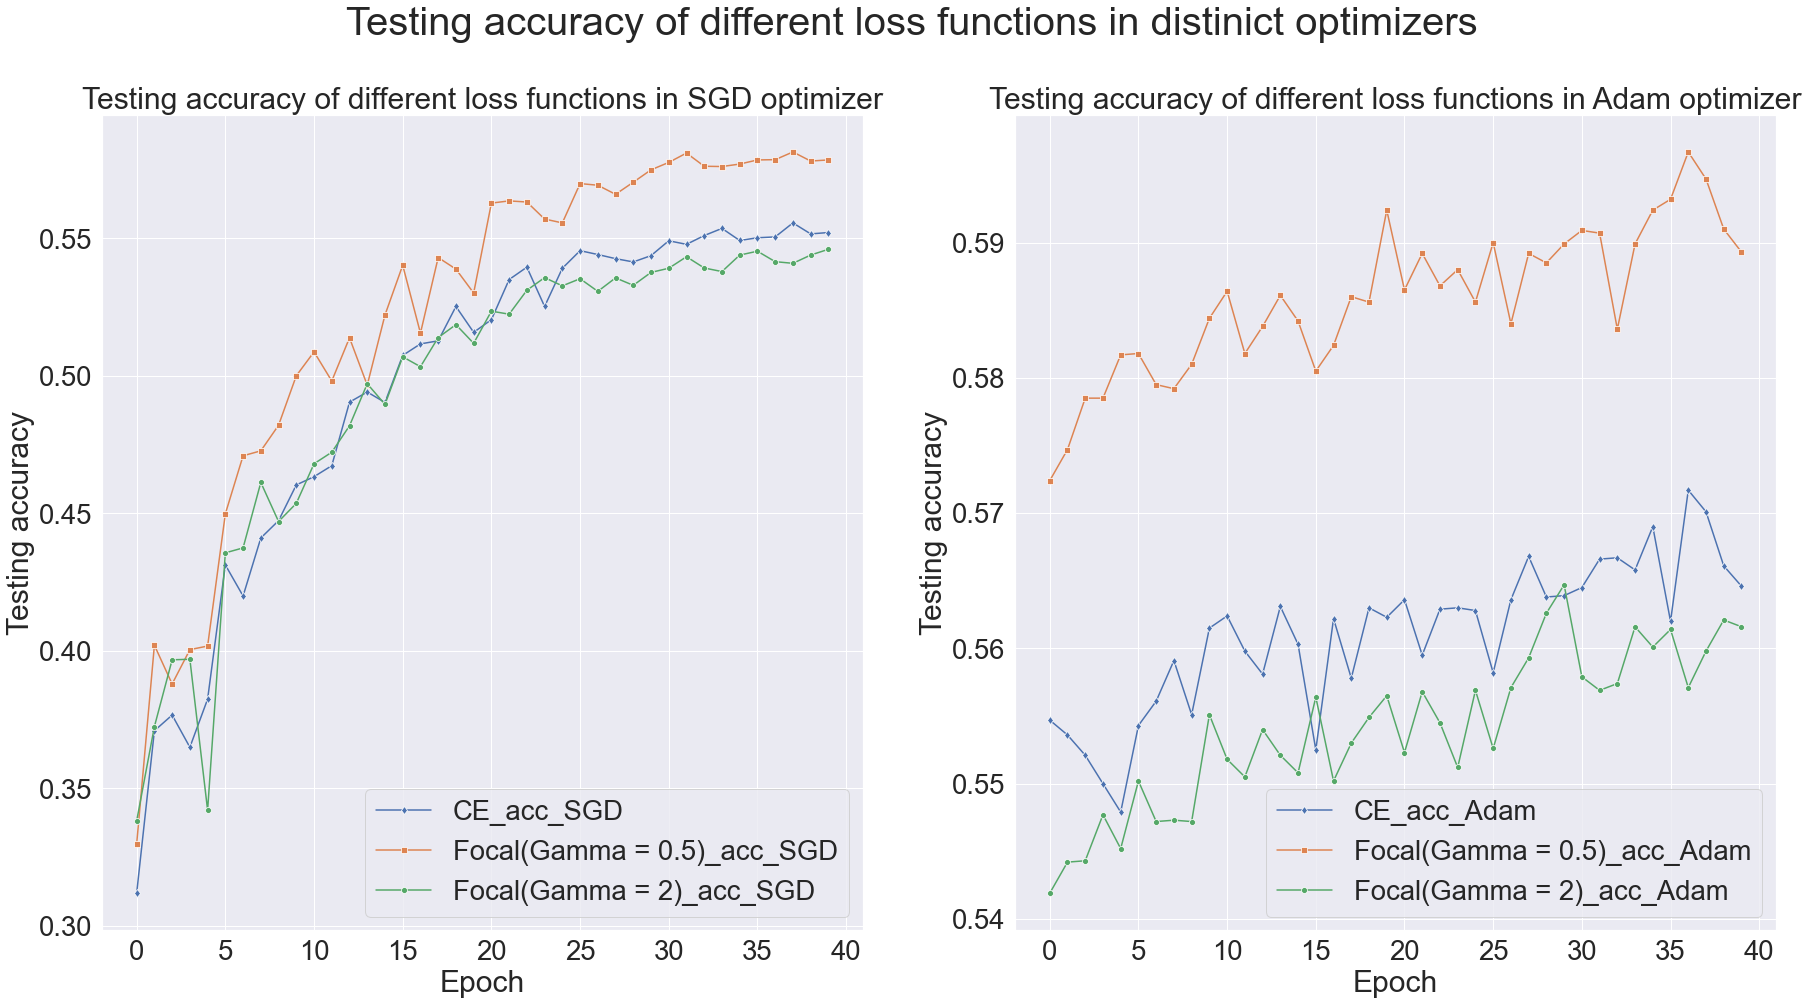

In [5]:
plt.figure(figsize=(30, 15))  #创建画布，用于放置子图
plt.suptitle('Testing accuracy of different loss functions in distinict optimizers', fontsize=40)  #给总画布取名字
sns.set(font_scale=2.5)

plt.subplot(121) #构建两行两列，并在第一个子图绘图
# sns.lineplot(data=l1['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o',linewidth=5)
sns.lineplot(data=l2['testing_acc_SGD'], label='CE_acc_SGD', markers=True, marker='d')
sns.lineplot(data=l3['testing_acc_SGD'], label='Focal(Gamma = 0.5)_acc_SGD', markers=True, marker='s')
sns.lineplot(data=l4['testing_acc_SGD'], label='Focal(Gamma = 2)_acc_SGD', markers=True, marker='o')
plt.ylabel('Testing accuracy')
plt.xlabel('Epoch')
plt.title('Testing accuracy of different loss functions in SGD optimizer')

plt.subplot(122) #构建两行两列，并在第一个子图绘图
# sns.lineplot(data=l1['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o',linewidth=5)
sns.lineplot(data=l2['testing_acc_Adam'], label='CE_acc_Adam', markers=True, marker='d')
sns.lineplot(data=l3['testing_acc_Adam'], label='Focal(Gamma = 0.5)_acc_Adam', markers=True, marker='s')
sns.lineplot(data=l4['testing_acc_Adam'], label='Focal(Gamma = 2)_acc_Adam', markers=True, marker='o')
plt.ylabel('Testing accuracy')
plt.xlabel('Epoch')
plt.title('Testing accuracy of different loss functions in Adam optimizer')



plt.savefig("fig//Acc2.svg")


# Convergence Speed

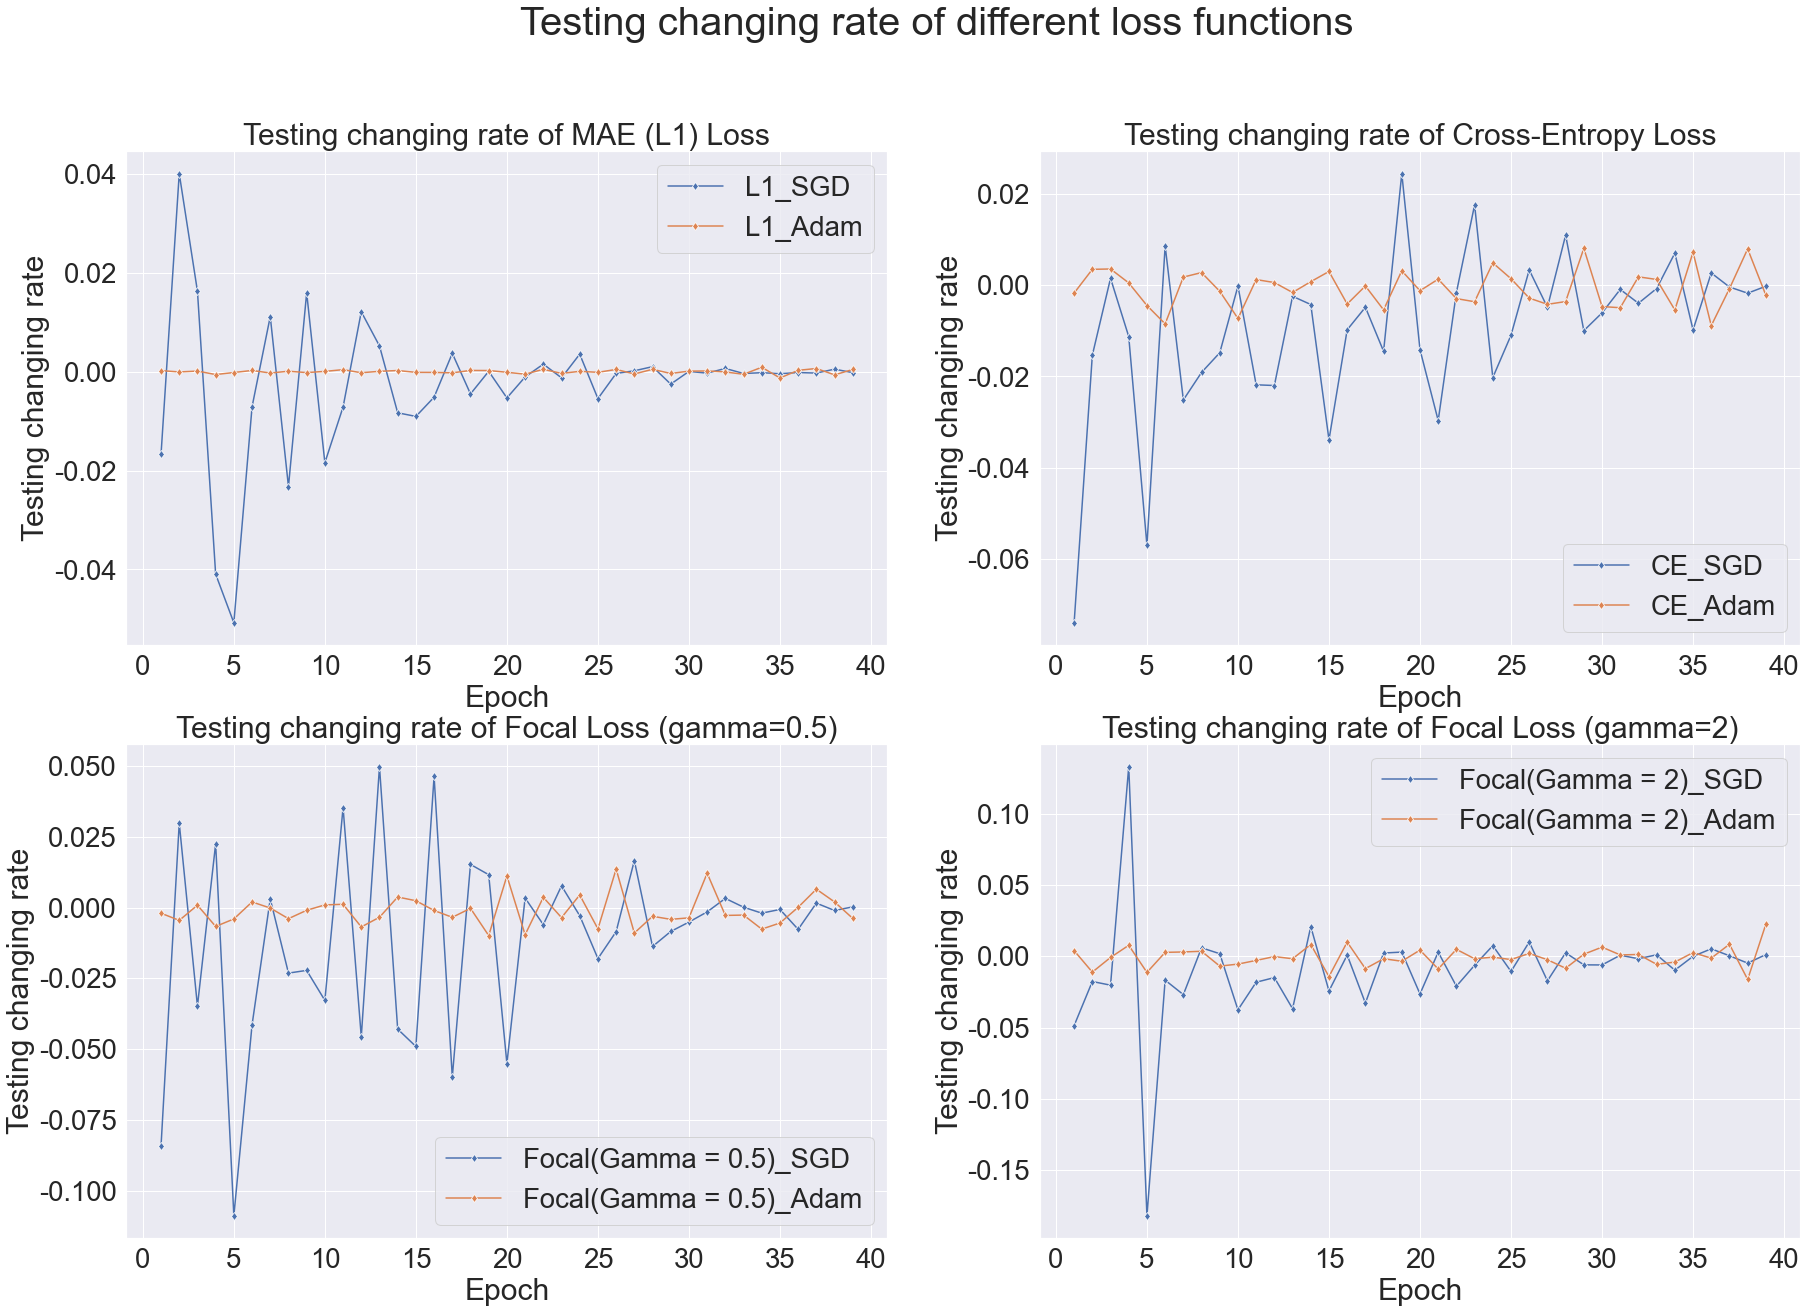

In [6]:
plt.figure(figsize=(30, 20))  #创建画布，用于放置子图
plt.suptitle('Testing changing rate of different loss functions', fontsize=40)  #给总画布取名字
sns.set(font_scale=2.5)

plt.subplot(221) #构建两行两列，并在第一个子图绘图
sns.lineplot(data=l1['testing_loss_SGD'].pct_change(), label='L1_SGD', markers=True, marker='d')
sns.lineplot(data=l1['testing_loss_Adam'].pct_change(), label='L1_Adam', markers=True, marker='d')
plt.xlabel('Epoch')
plt.ylabel('Testing changing rate')
plt.title('Testing changing rate of MAE (L1) Loss')

plt.subplot(222) #构建两行两列，并在第一个子图绘图
sns.lineplot(data=l2['testing_loss_SGD'].pct_change(), label='CE_SGD', markers=True, marker='d')
sns.lineplot(data=l2['testing_loss_Adam'].pct_change(), label='CE_Adam', markers=True, marker='d')
plt.xlabel('Epoch')
plt.ylabel('Testing changing rate')
plt.title('Testing changing rate of Cross-Entropy Loss')

plt.subplot(223) #构建两行两列，并在第一个子图绘图
sns.lineplot(data=l3['testing_loss_SGD'].pct_change(), label='Focal(Gamma = 0.5)_SGD', markers=True, marker='d')
sns.lineplot(data=l3['testing_loss_Adam'].pct_change(), label='Focal(Gamma = 0.5)_Adam', markers=True, marker='d')
plt.xlabel('Epoch')
plt.ylabel('Testing changing rate')
plt.title('Testing changing rate of Focal Loss (gamma=0.5)')

plt.subplot(224) #构建两行两列，并在第一个子图绘图
sns.lineplot(data=l4['testing_loss_SGD'].pct_change(), label='Focal(Gamma = 2)_SGD', markers=True, marker='d')
sns.lineplot(data=l4['testing_loss_Adam'].pct_change(), label='Focal(Gamma = 2)_Adam', markers=True, marker='d')
plt.xlabel('Epoch')
plt.ylabel('Testing changing rate')
plt.title('Testing changing rate of Focal Loss (gamma=2)')

plt.savefig("fig//Con1.svg")

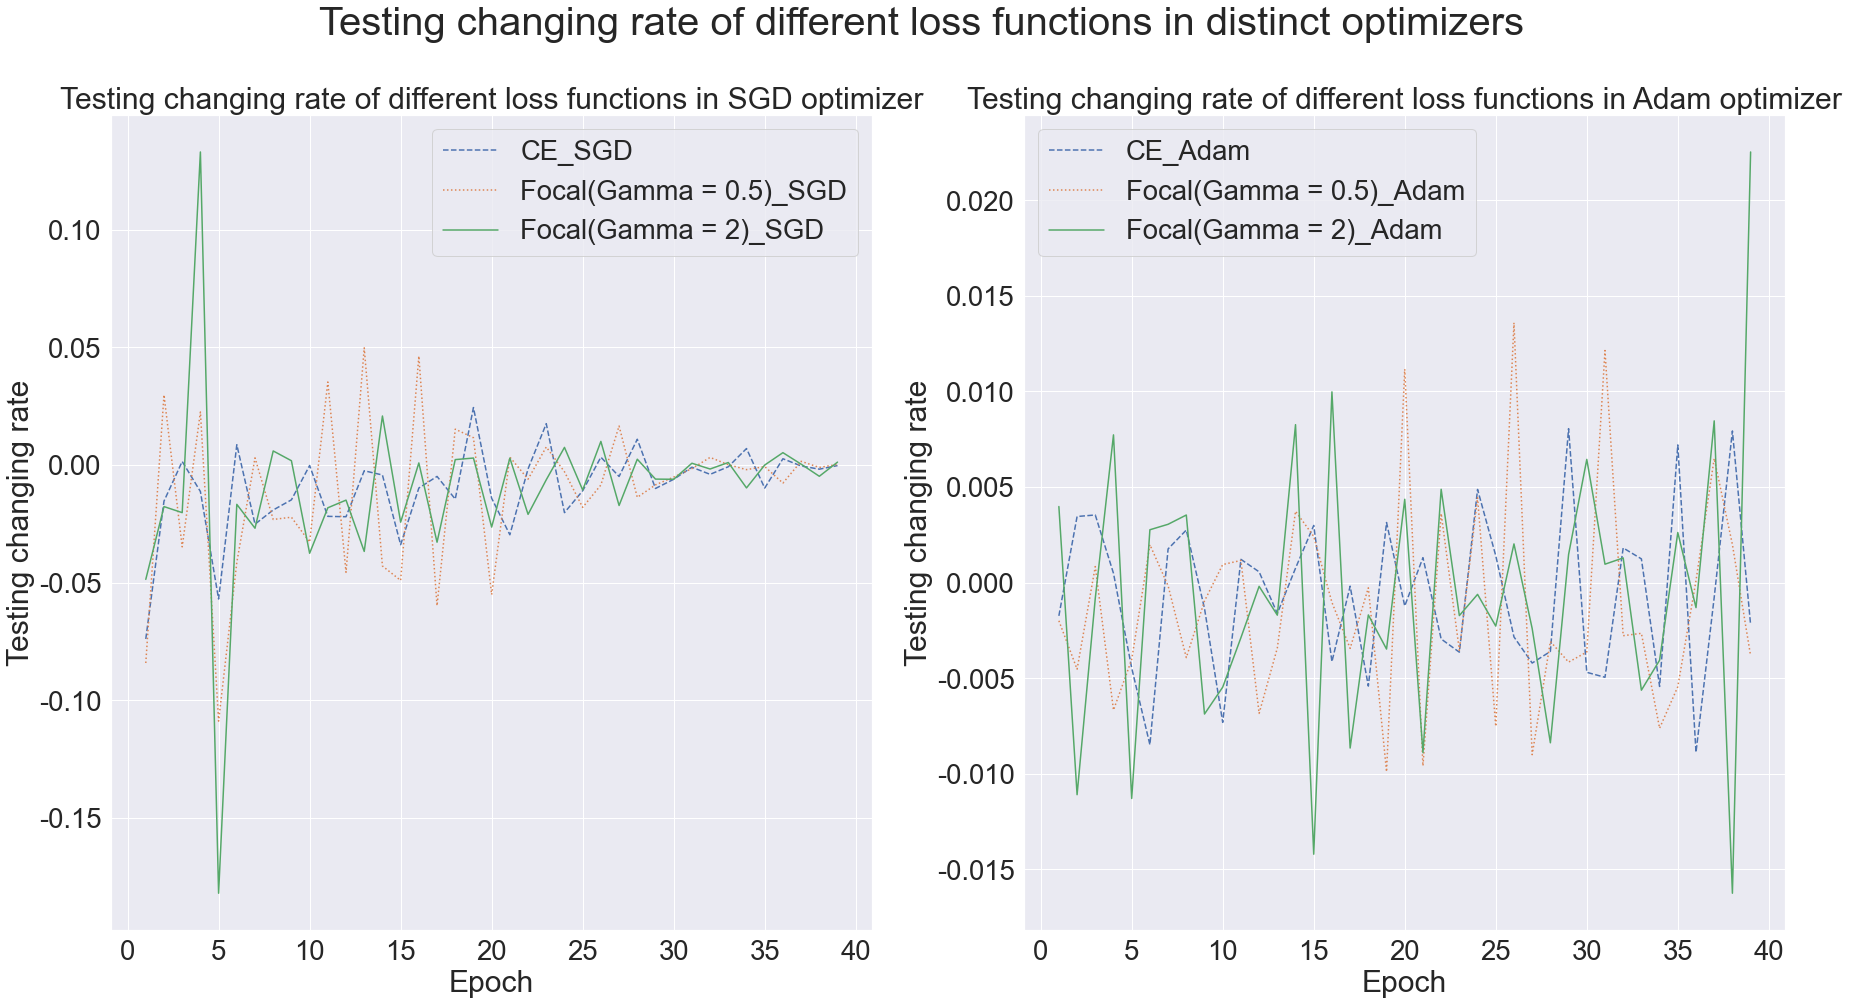

In [7]:
plt.figure(figsize=(30, 15))  #创建画布，用于放置子图
plt.suptitle('Testing changing rate of different loss functions in distinct optimizers', fontsize=40)  #给总画布取名字
sns.set(font_scale=2.5)

plt.subplot(121) #构建两行两列，并在第一个子图绘图
# sns.lineplot(data=l1['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o',linewidth=5)
sns.lineplot(data=l2['testing_loss_SGD'].pct_change(), label='CE_SGD',linestyle = '--')
sns.lineplot(data=l3['testing_loss_SGD'].pct_change(), label='Focal(Gamma = 0.5)_SGD',linestyle = ':')
sns.lineplot(data=l4['testing_loss_SGD'].pct_change(), label='Focal(Gamma = 2)_SGD')
plt.ylabel('Testing changing rate')
plt.xlabel('Epoch')
plt.title('Testing changing rate of different loss functions in SGD optimizer')

plt.subplot(122) #构建两行两列，并在第一个子图绘图
# sns.lineplot(data=l1['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o',linewidth=5)
sns.lineplot(data=l2['testing_loss_Adam'].pct_change(), label='CE_Adam',linestyle = '--')
sns.lineplot(data=l3['testing_loss_Adam'].pct_change(), label='Focal(Gamma = 0.5)_Adam',linestyle = ':')
sns.lineplot(data=l4['testing_loss_Adam'].pct_change(), label='Focal(Gamma = 2)_Adam')
plt.ylabel('Testing changing rate')
plt.xlabel('Epoch')
plt.title('Testing changing rate of different loss functions in Adam optimizer')



plt.savefig("fig//Con2.svg")

Adam 在后面波动较大？

In [8]:
data1=l2['testing_loss_Adam'].pct_change()[1:]
data2=l3['testing_loss_Adam'].pct_change()[1:]
data3=l4['testing_loss_Adam'].pct_change()[1:]
# print(data3)

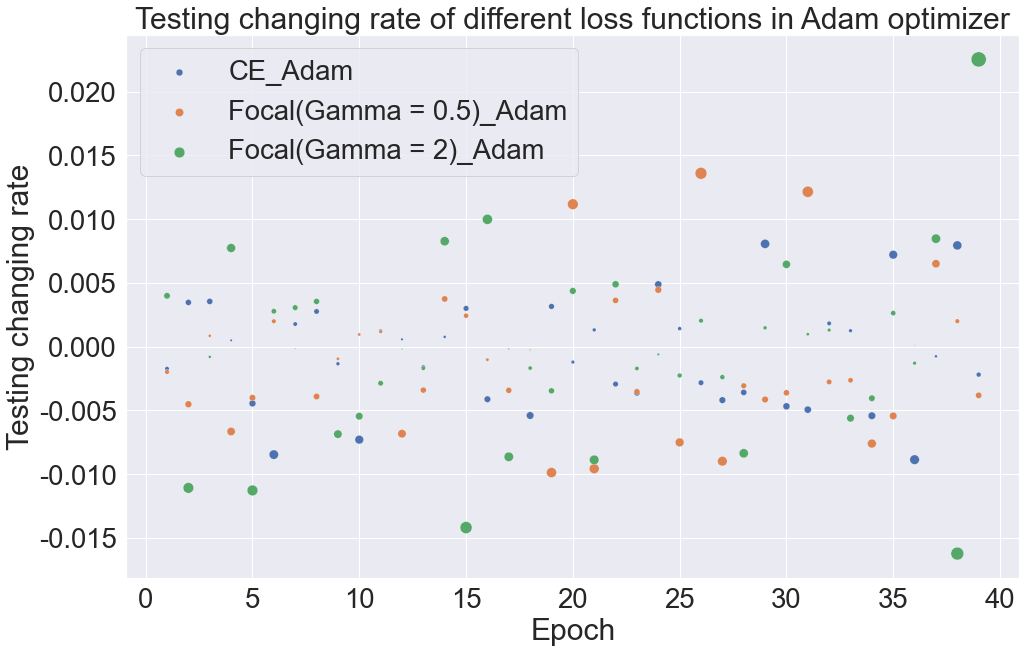

In [9]:
plt.figure(figsize=(16,10))  #创建画布，用于放置子图
sns.scatterplot(data = data1,s = abs(data1*10000))
sns.scatterplot(data = data2,s = abs(data2*10000))
sns.scatterplot(data = data3,s = abs(data3*10000))
plt.xlabel('Epoch')
plt.ylabel('Testing changing rate')
plt.title('Testing changing rate of different loss functions in Adam optimizer')
plt.legend(['CE_Adam','Focal(Gamma = 0.5)_Adam','Focal(Gamma = 2)_Adam'])

plt.savefig("fig//Con3.svg")

#  Overfitting and Generalization

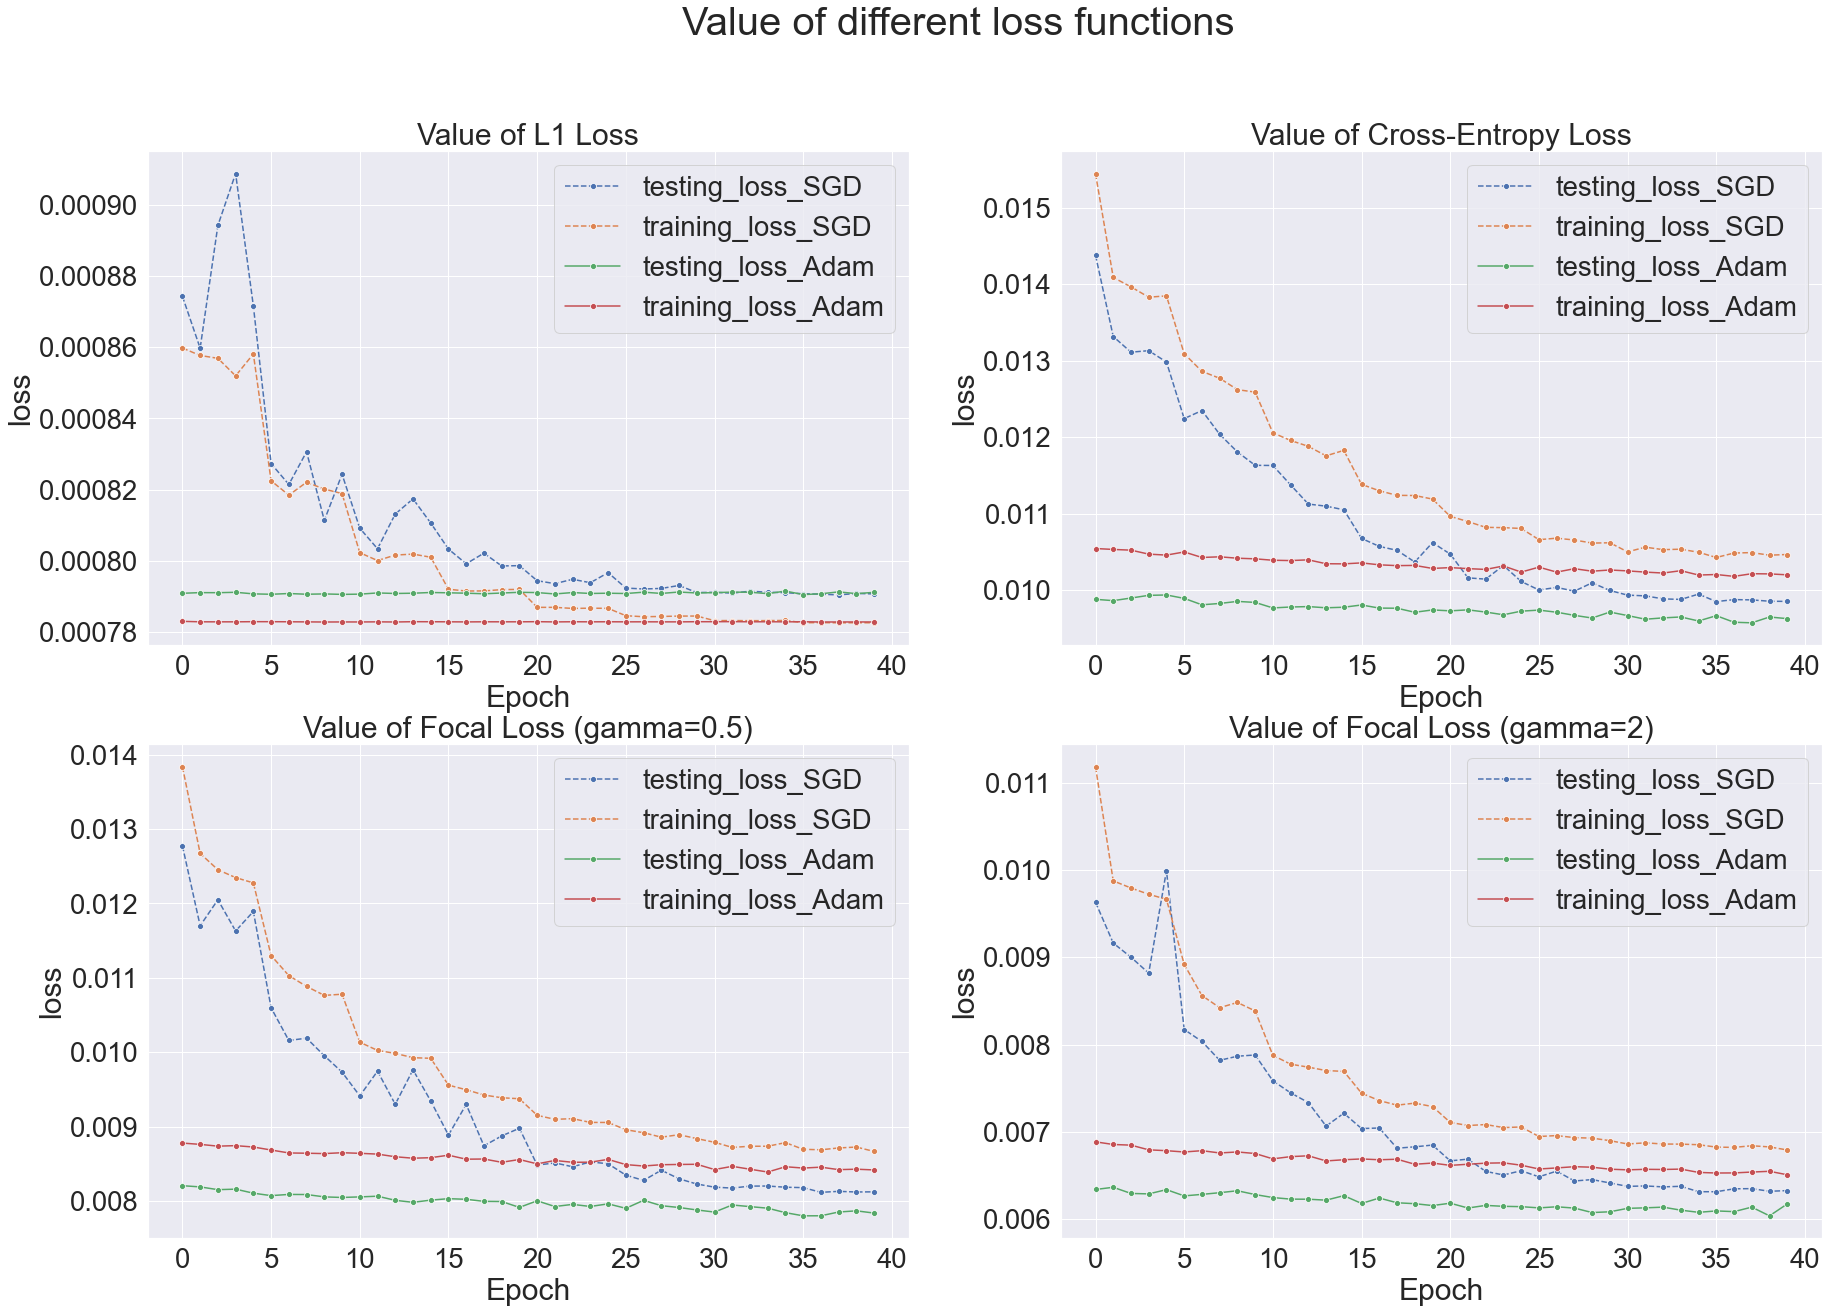

In [10]:
plt.figure(figsize=(30, 20))  #创建画布，用于放置子图
plt.suptitle('Value of different loss functions', fontsize=40)  #给总画布取名字
sns.set(font_scale=2.5)

plt.subplot(221) #构建两行两列，并在第一个子图绘图
sns.lineplot(data=l1['testing_loss_SGD'], label='testing_loss_SGD', markers=True,marker='o',linestyle = '--')
sns.lineplot(data=l1['training_loss_SGD'], label='training_loss_SGD', markers=True,marker='o',linestyle = '--')
sns.lineplot(data=l1['testing_loss_Adam'], label='testing_loss_Adam', markers=True,marker='o')
sns.lineplot(data=l1['training_loss_Adam'], label='training_loss_Adam', markers=True,marker='o')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Value of L1 Loss')

plt.subplot(222) 
sns.lineplot(data=l2['testing_loss_SGD'], label='testing_loss_SGD', markers=True, marker='o',linestyle = '--')
sns.lineplot(data=l2['training_loss_SGD'], label='training_loss_SGD', markers=True, marker='o',linestyle = '--')
sns.lineplot(data=l2['testing_loss_Adam'], label='testing_loss_Adam', markers=True, marker='o',)
sns.lineplot(data=l2['training_loss_Adam'], label='training_loss_Adam', markers=True, marker='o',)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Value of Cross-Entropy Loss')

plt.subplot(223) 
sns.lineplot(data=l3['testing_loss_SGD'], label='testing_loss_SGD', markers=True, marker='o',linestyle = '--')
sns.lineplot(data=l3['training_loss_SGD'], label='training_loss_SGD', markers=True, marker='o',linestyle = '--')
sns.lineplot(data=l3['testing_loss_Adam'], label='testing_loss_Adam', markers=True, marker='o',)
sns.lineplot(data=l3['training_loss_Adam'], label='training_loss_Adam', markers=True, marker='o',)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Value of Focal Loss (gamma=0.5)')

plt.subplot(224) 
sns.lineplot(data=l4['testing_loss_SGD'], label='testing_loss_SGD', markers=True, marker='o',linestyle = '--')
sns.lineplot(data=l4['training_loss_SGD'], label='training_loss_SGD', markers=True, marker='o',linestyle = '--')
sns.lineplot(data=l4['testing_loss_Adam'], label='testing_loss_Adam', markers=True, marker='o',)
sns.lineplot(data=l4['training_loss_Adam'], label='training_loss_Adam', markers=True, marker='o',)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Value of Focal Loss (gamma=2)')

plt.savefig("fig//O1.svg")

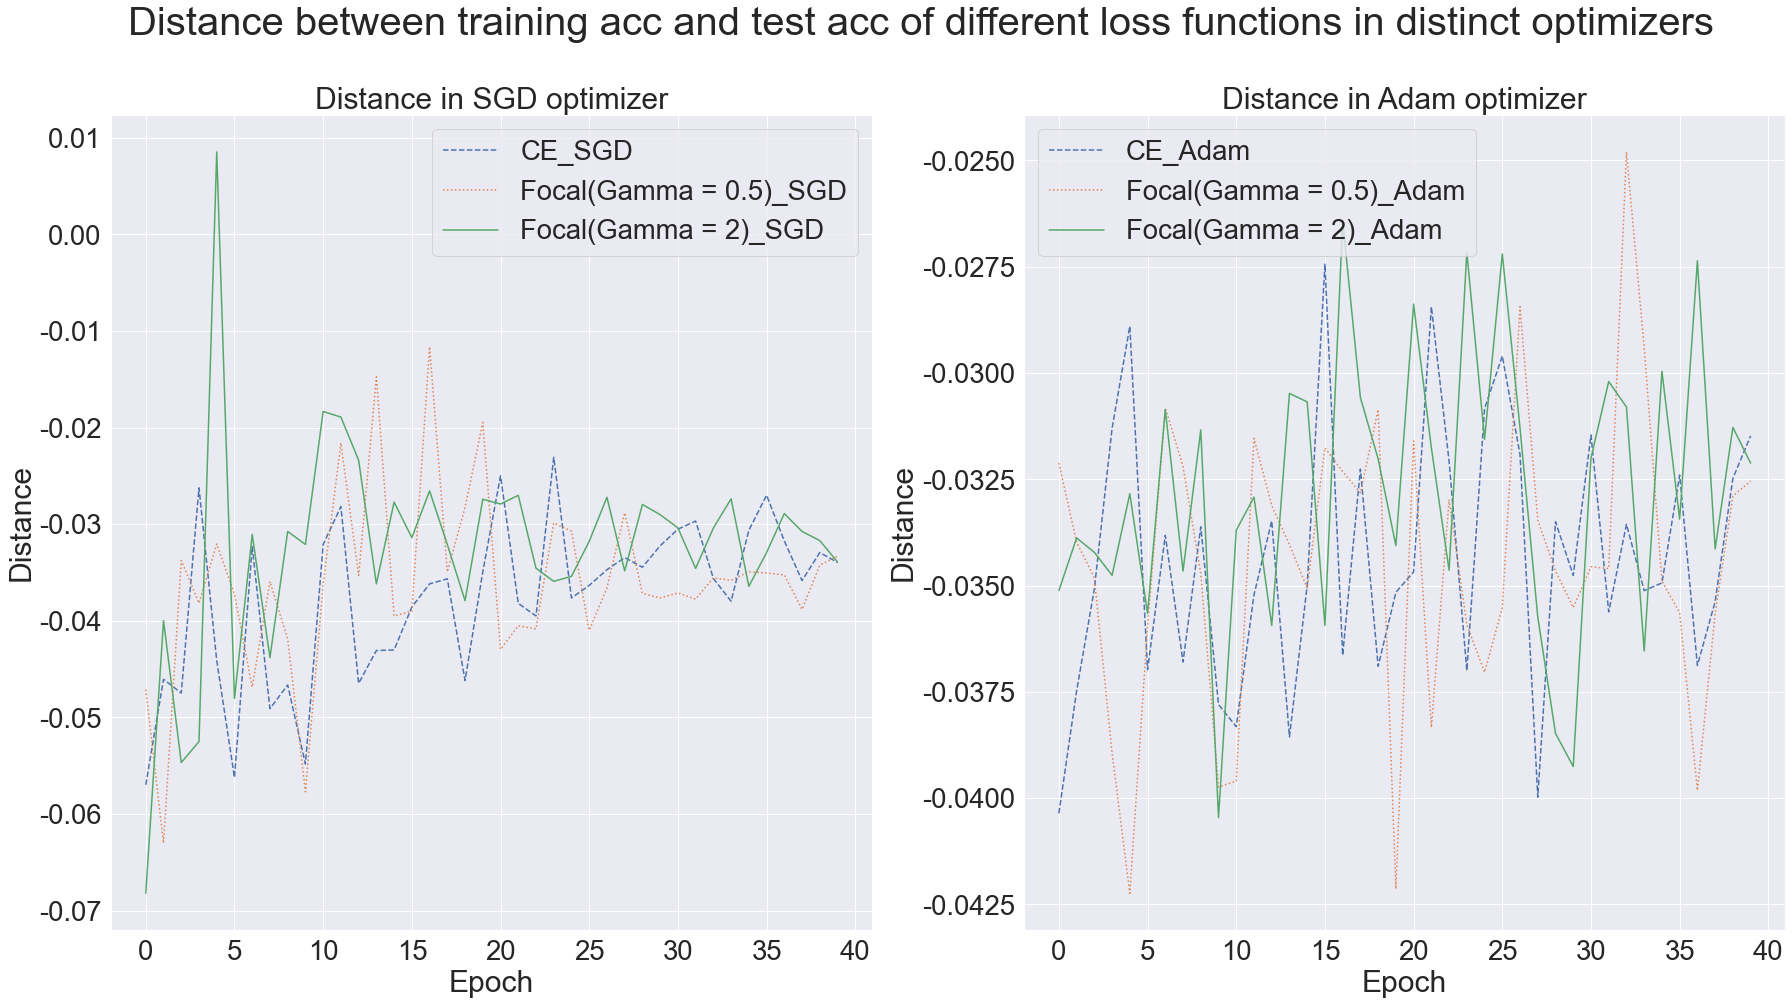

In [11]:
plt.figure(figsize=(30, 15))  #创建画布，用于放置子图
plt.suptitle('Distance between training acc and test acc of different loss functions in distinct optimizers', fontsize=40)  #给总画布取名字
sns.set(font_scale=2.5)

plt.subplot(121) #构建两行两列，并在第一个子图绘图
# sns.lineplot(data=l1['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o',linewidth=5)
sns.lineplot(data=l2['training_acc_SGD']-l2['testing_acc_SGD'], label='CE_SGD',linestyle = '--')
sns.lineplot(data=l3['training_acc_SGD']-l3['testing_acc_SGD'], label='Focal(Gamma = 0.5)_SGD',linestyle = ':')
sns.lineplot(data=l4['training_acc_SGD']-l4['testing_acc_SGD'], label='Focal(Gamma = 2)_SGD')
plt.ylabel('Distance')
plt.xlabel('Epoch')
plt.title('Distance in SGD optimizer')

plt.subplot(122) #构建两行两列，并在第一个子图绘图
# sns.lineplot(data=l1['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o',linewidth=5)
sns.lineplot(data=l2['training_acc_Adam']-l2['testing_acc_Adam'], label='CE_Adam',linestyle = '--')
sns.lineplot(data=l3['training_acc_Adam']-l3['testing_acc_Adam'], label='Focal(Gamma = 0.5)_Adam',linestyle = ':')
sns.lineplot(data=l4['training_acc_Adam']-l4['testing_acc_Adam'], label='Focal(Gamma = 2)_Adam')
plt.ylabel('Distance')
plt.xlabel('Epoch')
plt.title('Distance in Adam optimizer')



plt.savefig("fig//O2.svg")

# Sensitivity

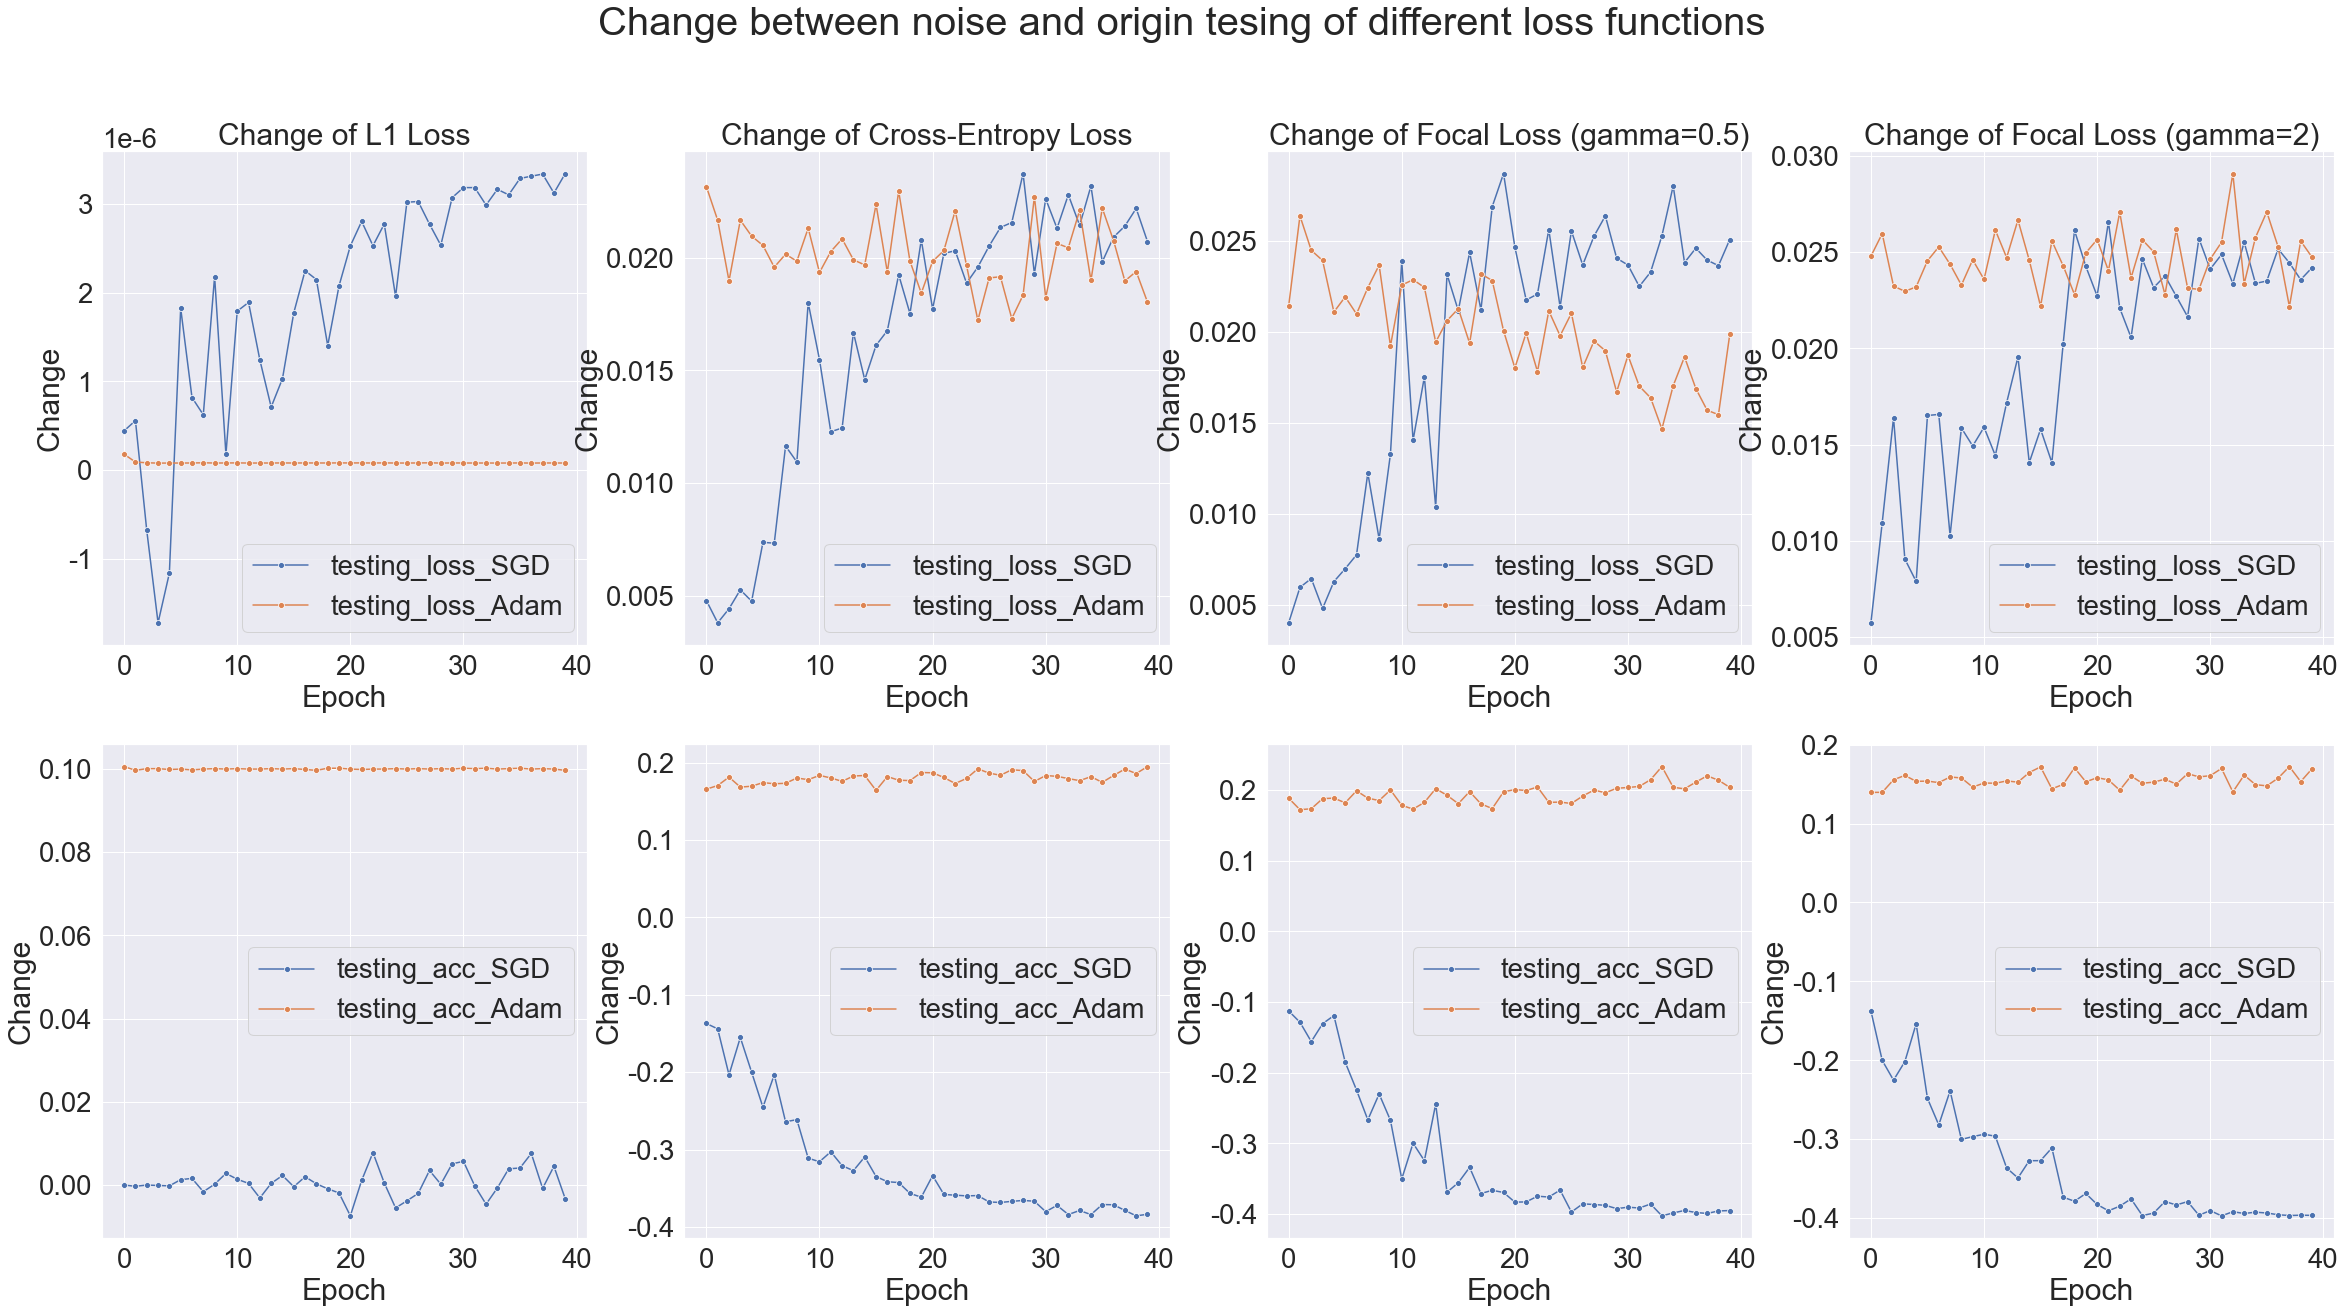

In [12]:
plt.figure(figsize=(40, 20))  #创建画布，用于放置子图
plt.suptitle('Change between noise and origin tesing of different loss functions', fontsize=40)  #给总画布取名字
sns.set(font_scale=2.5)

plt.subplot(241) #构建两行两列，并在第一个子图绘图
sns.lineplot(data=l1['testing_loss_SGD_S']-l1['testing_loss_SGD'], label='testing_loss_SGD', markers=True,marker='o')
sns.lineplot(data=l1['testing_loss_Adam_S']-l1['testing_loss_Adam'], label='testing_loss_Adam', markers=True,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Change')
plt.title('Change of L1 Loss')

plt.subplot(242) #构建两行两列，并在第一个子图绘图
sns.lineplot(data=l2['testing_loss_SGD_S']-l2['testing_loss_SGD'], label='testing_loss_SGD', markers=True,marker='o')
sns.lineplot(data=l2['testing_loss_Adam_S']-l2['testing_loss_Adam'], label='testing_loss_Adam', markers=True,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Change')
plt.title('Change of Cross-Entropy Loss')

plt.subplot(243) #构建两行两列，并在第一个子图绘图
sns.lineplot(data=l3['testing_loss_SGD_S']-l3['testing_loss_SGD'], label='testing_loss_SGD', markers=True,marker='o')
sns.lineplot(data=l3['testing_loss_Adam_S']-l3['testing_loss_Adam'], label='testing_loss_Adam', markers=True,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Change')
plt.title('Change of Focal Loss (gamma=0.5)')

plt.subplot(244) #构建两行两列，并在第一个子图绘图
sns.lineplot(data=l4['testing_loss_SGD_S']-l4['testing_loss_SGD'], label='testing_loss_SGD', markers=True,marker='o')
sns.lineplot(data=l4['testing_loss_Adam_S']-l4['testing_loss_Adam'], label='testing_loss_Adam', markers=True,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Change')
plt.title('Change of Focal Loss (gamma=2)')

# ----------------------------------------------

plt.subplot(245) 
sns.lineplot(data=l1['testing_acc_SGD_S']-l1['testing_acc_SGD'], label='testing_acc_SGD', markers=True,marker='o')
sns.lineplot(data=l1['testing_acc_Adam_S']-l1['testing_acc_Adam'], label='testing_acc_Adam', markers=True,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Change')

plt.subplot(246) 
sns.lineplot(data=l2['testing_acc_SGD_S']-l2['testing_acc_SGD'], label='testing_acc_SGD', markers=True,marker='o')
sns.lineplot(data=l2['testing_acc_Adam_S']-l2['testing_acc_Adam'], label='testing_acc_Adam', markers=True,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Change')

plt.subplot(247) 
sns.lineplot(data=l3['testing_acc_SGD_S']-l3['testing_acc_SGD'], label='testing_acc_SGD', markers=True,marker='o')
sns.lineplot(data=l3['testing_acc_Adam_S']-l3['testing_acc_Adam'], label='testing_acc_Adam', markers=True,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Change')

plt.subplot(248) 
sns.lineplot(data=l4['testing_acc_SGD_S']-l4['testing_acc_SGD'], label='testing_acc_SGD', markers=True,marker='o')
sns.lineplot(data=l4['testing_acc_Adam_S']-l4['testing_acc_Adam'], label='testing_acc_Adam', markers=True,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Change')

plt.savefig("fig//S1.svg")

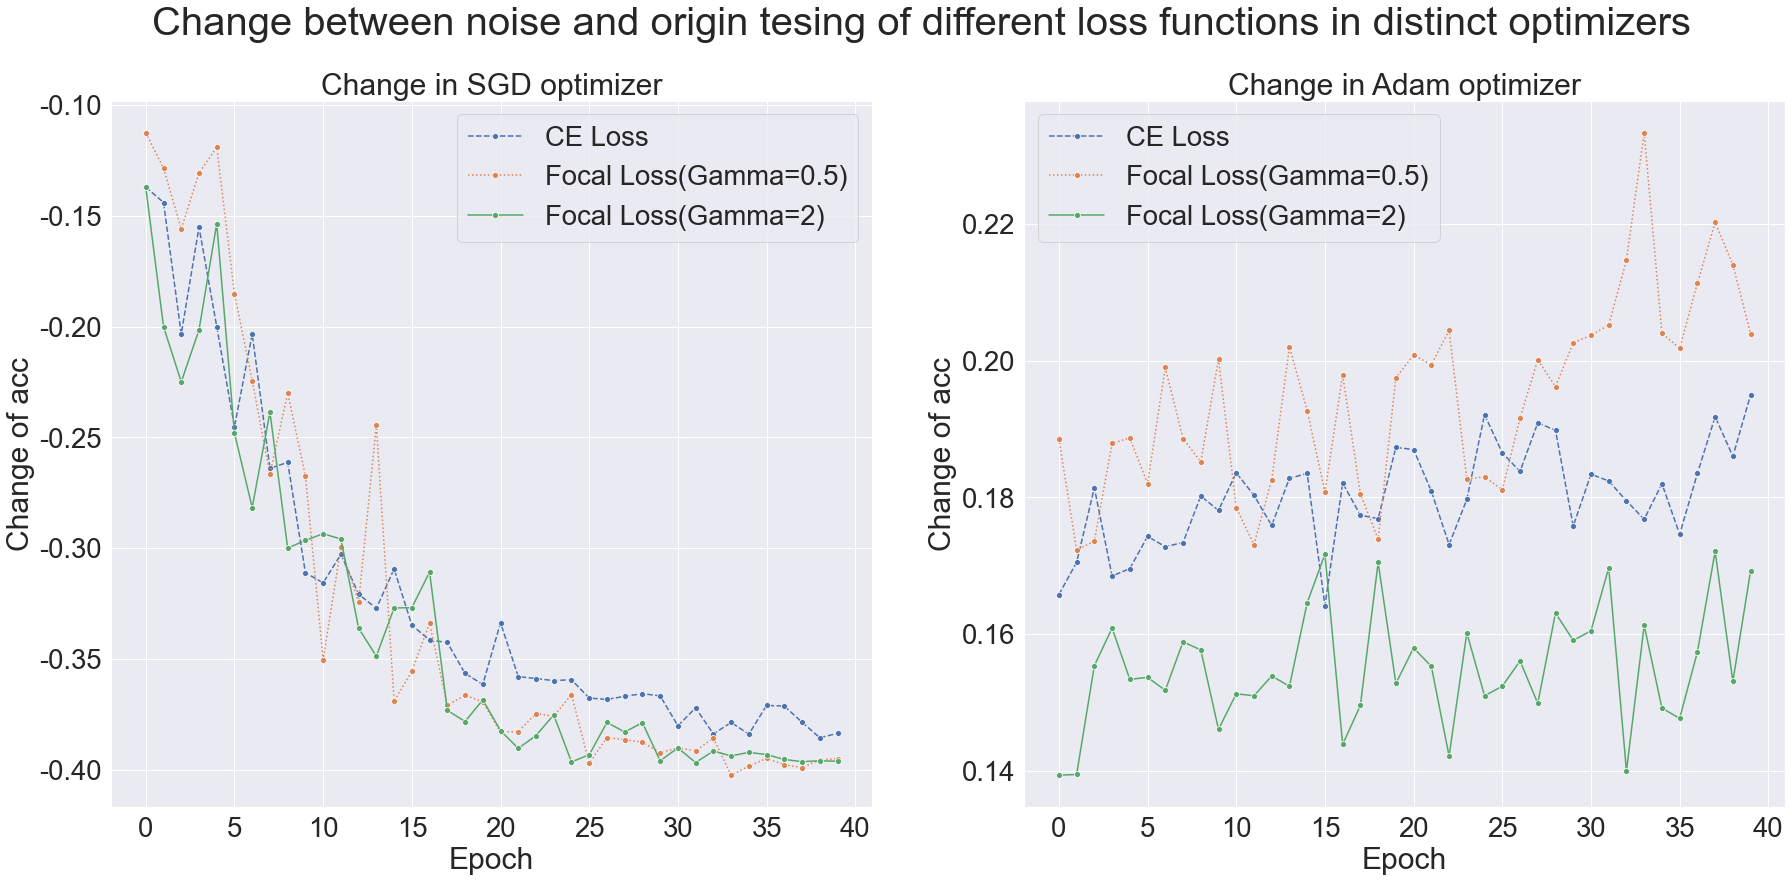

In [13]:
plt.figure(figsize=(30, 13))  #创建画布，用于放置子图
plt.suptitle('Change between noise and origin tesing of different loss functions in distinct optimizers', fontsize=40)  #给总画布取名字
sns.set(font_scale=2.5)

plt.subplot(121) #构建两行两列，并在第一个子图绘图
# sns.lineplot(data=l1['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o',linewidth=5)
sns.lineplot(data=l2['testing_acc_SGD_S']-l2['testing_acc_SGD'], label='CE Loss', markers=True,marker='o',linestyle='--')
sns.lineplot(data=l3['testing_acc_SGD_S']-l3['testing_acc_SGD'], label='Focal Loss(Gamma=0.5)', markers=True,marker='o',linestyle=':')
sns.lineplot(data=l4['testing_acc_SGD_S']-l4['testing_acc_SGD'], label='Focal Loss(Gamma=2)', markers=True,marker='o')
plt.ylabel('Change of acc')
plt.xlabel('Epoch')
plt.title('Change in SGD optimizer')

plt.subplot(122) #构建两行两列，并在第一个子图绘图
# sns.lineplot(data=l1['testing_acc_SGD'], label='acc_SGD', markers=True, marker='o',linewidth=5)
sns.lineplot(data=l2['testing_acc_Adam_S']-l2['testing_acc_Adam'], label='CE Loss', markers=True,marker='o',linestyle='--')
sns.lineplot(data=l3['testing_acc_Adam_S']-l3['testing_acc_Adam'], label='Focal Loss(Gamma=0.5)', markers=True,marker='o',linestyle=':')
sns.lineplot(data=l4['testing_acc_Adam_S']-l4['testing_acc_Adam'], label='Focal Loss(Gamma=2)', markers=True,marker='o')
plt.ylabel('Change of acc')
plt.xlabel('Epoch')
plt.title('Change in Adam optimizer')



plt.savefig("fig//S2.svg")